# Customer Support Agent 

In [10]:
import os
from typing import Dict, TypedDict
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph, END, START
from langgraph.graph.state import CompiledStateGraph
from IPython.display import Image,display
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY") 

In [11]:
class State(TypedDict) :
    category : str
    sentiment : str
    response : str
    query : str

In [23]:
def categorize(state : State) -> State : 
    """ categorie the customer service query into the following categorise: Technical, Billing, Sales and General categories """
    prompt = ChatPromptTemplate.from_template(
        "Categorize the following customer service query into one of the following categories: " 
        "Technical, Billing, General, or Sales. You should choose one category. \n\n Customer query: {query} "
    )    
    chain = prompt | ChatOpenAI(model='gpt-4o')
    category = chain.invoke({"query" : state['query']}).content
    return {"category" : category}

def analyze_sentiments(state : State) -> State :
    """ Analyze the sentiments of customer service query as a Positive, Negative, or Neutral"""
    propmt = ChatPromptTemplate.from_template(
        " Analyze the sentiments of the following customer service query as :" 
        " Positive, Negative, or Neutral. \n\n Customer query: {query} "
        )
    chain = propmt | ChatOpenAI(model='gpt-4o')
    sentiment = chain.invoke({"query" : state['query']}).content
    return {"sentiment" : sentiment}

def technical_response(state : State) -> State :
    """ Provide a technical support for response to the query  """
    prompt =ChatPromptTemplate.from_template(
        " Provide a technical support for response to the query. \n\n Customer query: {query} "
    )
    chain = prompt | ChatOpenAI(model='gpt-4o')
    response = chain.invoke({"query" : state["query"]}).content
    return {"response" : response}

def billing_response(state : State) -> State :
    """ Provide a billing support for response to the query  """
    prompt =ChatPromptTemplate.from_template(
        " Provide a billing support for response to the query. \n\n Customer query: {query} "
    )
    chain = prompt | ChatOpenAI(model='gpt-4o')
    response = chain.invoke({"query" : state["query"]}).content
    return {"response" : response}

def sales_response(state : State) -> State :
    """ Provide a sales support for response to the query  """
    prompt =ChatPromptTemplate.from_template(
        " Provide a sales support for response to the query. \n\n Customer query: {query} "
    )
    chain = prompt | ChatOpenAI(model='gpt-4o')
    response = chain.invoke({"query" : state["query"]}).content
    return {"response" : response}

def general_response(state : State) -> State :
    """ Provide a general support for response to the query  """
    prompt =ChatPromptTemplate.from_template(
        " Provide a general support for response to the query. \n\n Customer query: {query} "
    )
    chain = prompt | ChatOpenAI(model='gpt-4o')
    response = chain.invoke({"query" : state["query"]}).content
    return {"response" : response}

def escalate (state : State) -> State :
    """ Escalate the customer service query to a human representative/agent due to its negative sentiment """
    return {"response" : 'This query has been escalated to a human representative/agent due to its negative sentiment.'}

def route_query(state : State) -> State :
    """ Route the query based on its category and sentiment """
    
    if state['sentiment'] == 'Negetive' :
        return 'escalate'
    elif state['category'] == 'Technical' :
        return 'technical_response'
    elif state['category'] == 'Billing' :
        return 'billing_response'
    elif state["category"] == 'Sales' :
        return 'sales_response'
    else :
        return "general_response"
             
    

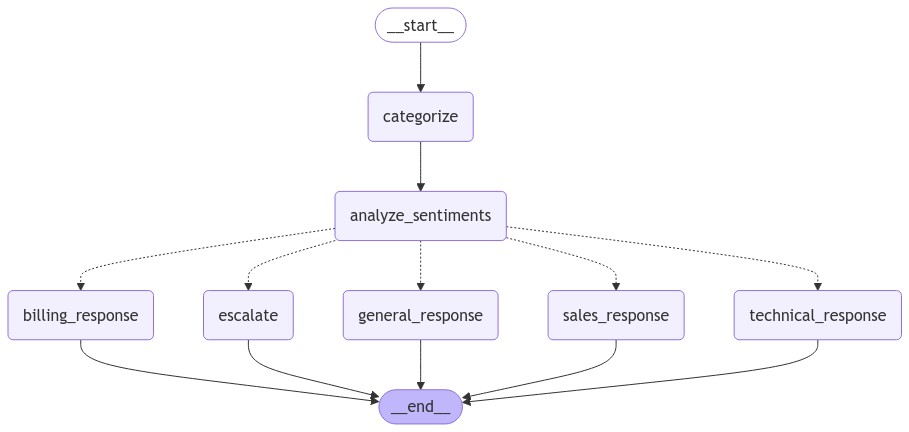

In [24]:
builder : StateGraph = StateGraph(State)
#add_nodes :
builder.add_node( "categorize" , categorize)
builder.add_node( "analyze_sentiments" , analyze_sentiments)
builder.add_node( 'technical_response' , technical_response)
builder.add_node("general_response",general_response)
builder.add_node("billing_response" , billing_response)
builder.add_node("sales_response" , sales_response)
builder.add_node( "escalate" , escalate)
#add_edges :
builder.add_edge(START, "categorize")
builder.add_edge("categorize", "analyze_sentiments")
builder.add_conditional_edges("analyze_sentiments", route_query,
                              {
                                  "technical_response" : "technical_response",
                                  "billing_response" : "billing_response",
                                  "general_response" : "general_response",
                                  "sales_response" : "sales_response",
                                  "escalate" : 'escalate'
                              })
builder.add_edge("technical_response", END)
builder.add_edge("billing_response", END)
builder.add_edge("general_response", END)
builder.add_edge("sales_response", END)
builder.add_edge("escalate", END)

graph : CompiledStateGraph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
def run_customer_support(query: str) -> Dict[str, str]:
    """Process a customer query through the LangGraph workflow.
    
    Args:
        query (str): The customer's query
        
    Returns:
        Dict[str, str]: A dictionary containing the query's category, sentiment, and response
    """
    results = graph.invoke({"query": query})
    return {
        "category": results["category"],
        "sentiment": results["sentiment"],
        "response": results["response"]
    }

In [26]:
query = "My internet connection keeps dropping. Can you help?"
result = run_customer_support(query)
print(f"Query: {query}")
print(f"Category: {result['category']}")
print(f"Sentiment: {result['sentiment']}")
print(f"Response: {result['response']}")
print("\n")

# handle_technical

query = "I need help talking to chatGPT"
result = run_customer_support(query)
print(f"Query: {query}")
print(f"Category: {result['category']}")
print(f"Sentiment: {result['sentiment']}")
print(f"Response: {result['response']}")
print("\n")

# handle_billing

query = "where can i find my receipt?"
result = run_customer_support(query)
print(f"Query: {query}")
print(f"Category: {result['category']}")
print(f"Sentiment: {result['sentiment']}")
print(f"Response: {result['response']}")
print("\n")

# handle_general

query = "What are your business hours?"
result = run_customer_support(query)
print(f"Query: {query}")
print(f"Category: {result['category']}")
print(f"Sentiment: {result['sentiment']}")
print(f"Response: {result['response']}")

Query: My internet connection keeps dropping. Can you help?
Category: Technical
Sentiment: The sentiment of the customer service query is Neutral.
Response: Certainly! Here’s a step-by-step guide to troubleshoot and resolve issues with an intermittent internet connection:

1. **Check Physical Connections:**
   - Ensure all cables (Ethernet, coaxial, etc.) are securely connected to the modem and router.
   - If using Wi-Fi, verify that your device is within range of the router.

2. **Restart Your Equipment:**
   - Power cycle your modem and router by unplugging them from the power source.
   - Wait about 30 seconds, then plug them back in.
   - Allow a few minutes for the devices to fully reboot.

3. **Check for Service Outages:**
   - Contact your Internet Service Provider (ISP) or check their website/mobile app to see if there are any reported outages in your area.

4. **Update Firmware:**
   - Log into your router’s settings (refer to the router’s manual for instructions) and check i